### PyTorch Imports 

**torch** is the top level pytorch package and tensor library 
<enter>**torchvision** is package that provides access to datasets, models and transforms for computer vision 
<enter>**torchvision.transforms** is an interface which gives us access to common transforms for image processing 


In [15]:
import torch
import torchvision
import torchvision.transforms as transform 
from torch.utils.data import Dataset, DataLoader

### Other Imports 

**pandas** for easy csv parsing

**matplotlib.pyplot** for plots

In [55]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from skimage import io
import os 

#### Lets look at the data using pandas 

In [40]:
landmarks_frame = pd.read_csv('data/faces/face_landmarks.csv')


idx = 65
img_name = landmarks_frame.iloc[idx, 0]
landmarks = landmarks_frame.iloc[idx, 1:].as_matrix()
landmarks = landmarks.astype('float').reshape(-1, 2)



print("Image name: ", (img_name), "\n")
print("Landmarks shape: ", (landmarks.shape), "\n")
print("First 4 Landmarks: ", (landmarks[:4]), "\n")

Image name:  person-7.jpg 

Landmarks shape:  (68, 2) 

First 4 Landmarks:  [[32. 65.]
 [33. 76.]
 [34. 86.]
 [34. 97.]] 



#### Let us create a helper function to display the landmarks

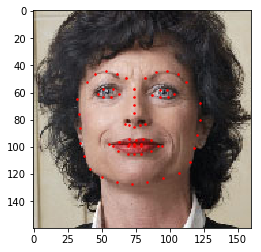

In [64]:
def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  # pause a bit so that plots are updated

plt.figure()

show_landmarks(io.imread(os.path.join('data/faces/', img_name)),landmarks)


### Prepare Data

**The ETL process** 

<enter> To prepare our data, we'll be following what is loosely known as an ETL process.

- **Extract** data from a data source (Eg. Fasion-MNIST image data)
- **Transform** data into a desirable format (**tensor** format)
- **Load data** into a suitable structure (Put data into an object for easy access)

For these purposes, PyTorch provides us with two classes


**torch.utils.data.Dataset** - 	An abstract class for representing a dataset.

**torch.utils.data.DataLoader** - 	Wraps a dataset and provides access to the underlying data.

An abstract class is a Python class that has methods we must implement, so we can create a custom dataset by creating a subclass that extends the functionality of the Dataset class.

To create a custom dataset using PyTorch, we extend the Dataset class by creating a subclass that implements these required methods. 

We can inherit from it to create a custom Dataset by overriding:

- **\__len__** so that len(dataset) returns the size of the dataset
- **\__getitem__** such that dataset[i] can return the ith datapoint

Upon doing this, our new subclass can then be passed to the a PyTorch DataLoader object.



In [19]:
class FaceLandmarksDataset(Dataset):
    """Face Landmarks dataset."""
    
    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:].as_matrix()
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

Let’s instantiate this class and iterate through the data samples. We will print the sizes of first 4 samples and show their landmarks

0 (324, 215, 3) (68, 2)


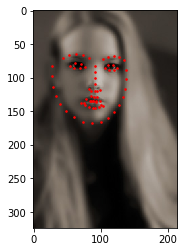

1 (500, 333, 3) (68, 2)


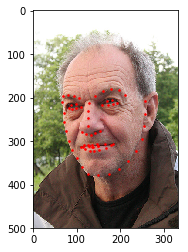

2 (250, 258, 3) (68, 2)


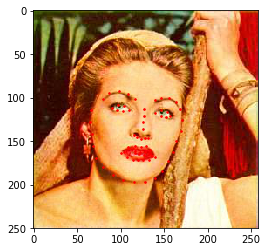

3 (434, 290, 3) (68, 2)


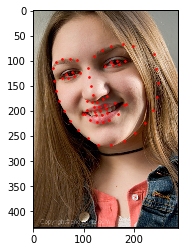

4 (828, 630, 3) (68, 2)


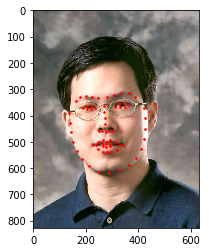

In [79]:
face_dataset = FaceLandmarksDataset(csv_file='data/faces/face_landmarks.csv',
                                    root_dir='data/faces/')

fig = plt.figure()

for i in range(len(face_dataset)):
    sample = face_dataset[i]

    print(i, sample['image'].shape, sample['landmarks'].shape)

    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)

    if i == 4:
        break

### Transforms 